In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR,SVC
from sklearn.preprocessing import LabelEncoder,StandardScaler,MaxAbsScaler,MinMaxScaler,OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [3]:
df=pd.read_csv("/content/online_retail_customer_churn.xls")
df.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [4]:
df.isnull().sum()

Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
for col in df.columns:
  print(col)

Customer_ID
Age
Gender
Annual_Income
Total_Spend
Years_as_Customer
Num_of_Purchases
Average_Transaction_Amount
Num_of_Returns
Num_of_Support_Contacts
Satisfaction_Score
Last_Purchase_Days_Ago
Email_Opt_In
Promotion_Response
Target_Churn


In [11]:
df=df.drop(["Customer_ID",
"Age","Gender","Email_Opt_In"],axis=1)
df.head()

,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Promotion_Response,Target_Churn
0,45.15,5892.58,5,22,453.80,2,0,3,129,Responded,True
1,79.51,9025.47,13,77,22.90,2,2,3,227,Responded,False
2,29.19,618.83,13,71,50.53,5,2,2,283,Responded,True
3,79.63,9110.30,3,33,411.83,5,3,5,226,Ignored,True
4,77.66,5390.88,15,43,101.19,3,0,5,242,Unsubscribed,False


In [15]:
df.dtypes

Annual_Income                 float64
Total_Spend                   float64
Years_as_Customer               int64
Num_of_Purchases                int64
Average_Transaction_Amount    float64
Num_of_Returns                  int64
Num_of_Support_Contacts         int64
Satisfaction_Score              int64
Last_Purchase_Days_Ago          int64
Promotion_Response             object
Target_Churn                     bool
dtype: object

In [17]:
df.Years_as_Customer.unique()

array([ 5, 13,  3, 15, 19,  4,  1, 17, 12,  9, 10, 11, 14,  6,  7, 18, 16,
        8,  2])

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
le=LabelEncoder()
s=StandardScaler()
mm=MinMaxScaler()
df.Target_Churn=le.fit_transform(df.Target_Churn)
cols = ["Annual_Income", "Total_Spend", "Years_as_Customer", "Num_of_Purchases", "Average_Transaction_Amount"]
df[cols] = mm.fit_transform(df[cols])
# df=pd.get_dummies(columns=["Promotion_Response"],data=df)


In [38]:
df.head()

,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Target_Churn,Promotion_Response_Ignored,Promotion_Response_Responded,Promotion_Response_Unsubscribed
0,0.139884,0.584755,0.222222,0.214286,0.906422,2,0,3,129,1,False,True,False
1,0.331071,0.901506,0.666667,0.775510,0.025434,2,2,3,227,0,False,True,False
2,0.051079,0.051552,0.666667,0.714286,0.081924,5,2,2,283,1,False,True,False
3,0.331738,0.910083,0.111111,0.326531,0.820613,5,3,5,226,1,True,False,False
4,0.320777,0.534031,0.777778,0.428571,0.185500,3,0,5,242,0,False,False,True


In [41]:
df.Last_Purchase_Days_Ago=df.Last_Purchase_Days_Ago/365
df.head()


,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Target_Churn,Promotion_Response_Ignored,Promotion_Response_Responded,Promotion_Response_Unsubscribed
0,0.139884,0.584755,0.222222,0.214286,0.906422,2,0,3,0.353425,1,False,True,False
1,0.331071,0.901506,0.666667,0.775510,0.025434,2,2,3,0.621918,0,False,True,False
2,0.051079,0.051552,0.666667,0.714286,0.081924,5,2,2,0.775342,1,False,True,False
3,0.331738,0.910083,0.111111,0.326531,0.820613,5,3,5,0.619178,1,True,False,False
4,0.320777,0.534031,0.777778,0.428571,0.185500,3,0,5,0.663014,0,False,False,True


In [46]:
df.Num_of_Returns=df.Num_of_Returns/10
df.Satisfaction_Score=df.Satisfaction_Score/10


In [50]:
df.Num_of_Support_Contacts/=10

In [51]:
df.head()


,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Target_Churn,Promotion_Response_Ignored,Promotion_Response_Responded,Promotion_Response_Unsubscribed
0,0.139884,0.584755,0.222222,0.214286,0.906422,0.2,0.0,0.3,0.353425,1,False,True,False
1,0.331071,0.901506,0.666667,0.775510,0.025434,0.2,0.2,0.3,0.621918,0,False,True,False
2,0.051079,0.051552,0.666667,0.714286,0.081924,0.5,0.2,0.2,0.775342,1,False,True,False
3,0.331738,0.910083,0.111111,0.326531,0.820613,0.5,0.3,0.5,0.619178,1,True,False,False
4,0.320777,0.534031,0.777778,0.428571,0.185500,0.3,0.0,0.5,0.663014,0,False,False,True


In [55]:

x=df.drop("Target_Churn",axis=1)
y=df.Target_Churn

In [54]:
x.shape,y.shape

((1000, 12), (1000,))

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
model=DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier()

In [66]:
model.score(x_train,y_train)

1.0

In [67]:
model.score(x_test,y_test)

1.0

In [69]:
p=model.predict(x_test)
p

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0])

In [74]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,p)
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [75]:
cm

array([[ 94,   0],
       [  0, 106]])

Text(50.722222222222214, 0.5, 'Actual')

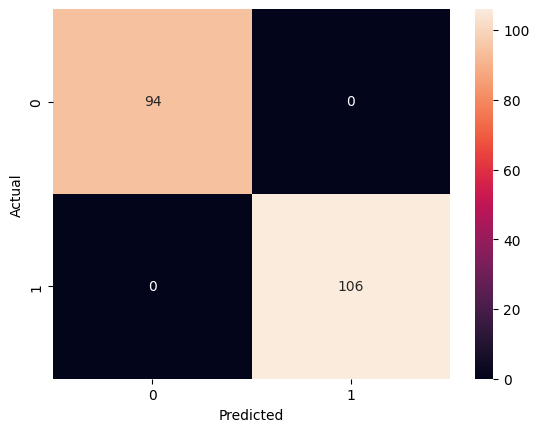

In [77]:
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")